# 第四章 随机数与抽样模拟 P54

## 4.1 一元随机数的产生

In [ ]:
# 4.1.1 均匀分布随机数
runif(3,1,3) #生成3个[1,3]的均匀分布随机数
runif(5) #默认生成5个[0,1]上的均匀分布的随机数

In [ ]:
set.seed(1) #种子取一样，生成的随机数相同
runif(5)

In [ ]:
Nsim = 10^3
x = runif(Nsim)
x1 = x[-Nsim] #因为要求自相关系数，去掉最后一个数
x2 = x[-1] #去掉第一个数
par(mfrow = c(1,3))
hist(x,prov=T,col = gray(0.3),main="uniform on [0,1]") #直方图📊
curve(dunif(x,0,1),add=T,col="red") #添加均匀分布密度函数线
plot(x1,x2,col="red")
acf(x) #画自相关系数图


In [ ]:
#4.1.2 正态分布随机数
rnorm(5,10,5) #产生五个均值为10，标准差为5的正态分布随机数
rnorm(5) #默认五个生成标准正态分布随机数

In [ ]:
x = rnorm(100)
hist(x,prob=T,main="normal mu=0,sigma=1") #作直方图📊
curve(dnorm(x),add=T) #在直方图📊上添加标准正态分布密度函数线

In [ ]:
# 4.1.3 指数分布随机数
x = rexp(100,1/10) #生成100个均值为10的指数分布随机数
hist(x,prob=T,col=gray(0.9),main="An exponentially distributed random number with a mean of 10")
curve(dexp(x,1/10),add=T)

In [ ]:
Nsim = 10^4
U = runif(Nsim)
X = -log(U)
Y = rexp(Nsim)
par(mfrow = c(1,2))
hist(X , freq = F , main = "Exp from Uniform")
curve(dexp(x,1),add=T,col="red")
hist(Y,freq=F,main="Exp from R")
curve(dexp(x,1),add=T,col="red")

In [ ]:
# 4.1.4 离散分布随机数的生成
size = 1;p = 0.5
rbinom(10,size,p)

size = 10; p = 0.5
rbinom(5,size,p) #生成5个服从B(10,0.5)的二项分布随机数

In [ ]:
par(mfrow=c(1,3))
p = 0.25
for( n in c(10,20,50))
{ x = rbinom(100,n,p)
    hist(x,prob=T,main=paste("n =" , n))
    xvals=0:n
    points(xvals,dbinom(xvals,n,p),type="h",lwd=3)
}
par(mfrow=c(1,1))

## 4.2 多元随机数的生成

In [ ]:
# 4.2.1 多元正态分布随机数
library(MASS) #载入MASS包
Sigma <- matrix(c(10,3,3,2),2,2)
Sigma

x = mvrnorm(n = 1000 , rep(0,2) , Sigma)
head(x)

var(x)

In [ ]:
# install.packages("MASS")
library(MASS)

sigma <- matrix(c(10,3,3,2), ncol = 2)
x <- mvrnorm(n = 500, mu = c(1,2), Sigma = sigma)
head(x)

colMeans(x)

var(x)

plot(x)

#Mvnorm 包并不存在。可能是想使用 MASS 包中的 mvrnorm 函数。
#在 MASS 包中，多元正态分布的随机数生成函数是 mvrnorm，而不是 rmvnorm。


In [ ]:
# 安装并加载mvtnorm包
# install.packages("mvtnorm")
library(mvtnorm)

# 4.2.2 多元正态分布密度函数/分位数与累积概率
(mean <- rep(0,5)) #均值向量
(lower <- rep(-1,5)) #下限
(upper <- rep(3,5)) #上限
(corr <- diag(5)) #相关系数矩阵

(corr[lower.tri(corr)] <- 0.5) #相关系数矩阵下三角用0.5赋值
(corr[upper.tri(corr)] <- 0.5) #相关系数矩阵上三角用0.5赋值
corr

(prob <- pmvnorm(lower = lower, upper = upper, mean = mean, sigma = corr))

# 如果想查看计算的误差和方法，可以使用以下代码：
attr(prob, "error")
attr(prob, "msg")


In [ ]:
# 4.2.3 多元t分布随机数
sigma = diag(2) + 1
sigma

x2 <- rmvt(n = 1000,df = 5 , sigma = sigma)
head(x2)
plot(x2)

## 4.3 随机抽样

In [ ]:
# 4.3.1 放回与无放回抽样
sample(1:6,10,rep=T)

sample(100,10) #从100个产品中无放回随机抽取10个

dice = as.vector(outer(1:6,1:6,paste)) #掷两颗六面的骰子
sample(dice,5,replace=T) #重复五次

dice = as.vector(outer(1:6,1:6,paste)) #掷两颗六面的骰子的可能结果
dice

In [ ]:
# 4.3.2 bootstrap重抽样
faithful #读入内置数据📊

attach(faithful) #数据绑定
sample(eruptions,10,replace = T) #从数据中抽取一个样本量为10的子样本

Sample = sample(eruptions,1000,rep=T) #抽取一个样本量为1000的bootstrap样本
par(mfrow = c(1,2)) #设置作图窗口为一行两列
hist(eruptions , breaks = 25)
hist(Sample,breaks = 25)
par(mfrow = c(1,1)) # 设置作图窗口为一行一列

## 4.4 统计📉模拟

In [ ]:
# 4.4.1 几种常见的模拟方法
n = 10; p = 0.25
z = rbinom(1,n,p)
x = (x-n*p)/sqrt(n*p*(1-p))

In [ ]:
m = 100 #m为模拟次数
n = 10 ; p = 0.25
z = rbinom(m,n,p) #产生100个二项随机数
x = (z-n*p)/sqrt(n*p*(1-p)) #对100个二项随机数标准化
hist(x,prob = T,main = paste("n =",n))
curve(dnorm(x),add = T) #添加正态曲线

In [ ]:
# 用函数来进行模拟
sim.clt <- function (m = 100 , n = 10 , p = 0.25)
{ z = rbinom(m,n,p)
    x = (z-n*p) / sqrt(n*p*(1-p))
    hist(x,prob = T , breaks = 20 , main = paste("n =" , n , "p =",p))
    curve(dnorm(x),add=T)
}
sim.clt() #默认m=100，n=10，p=0.25
sim.clt(1000) #取m=1000,n=10,p=0.25
sim.clt(1000,30) #取m=1000,n=30,p=0.25
sim.clt(1000,30,0.5) #取m=1000,n=10,p=0.5

In [ ]:
par(mfrow = c(2,2)) #设置2行2列的作图窗口
x = rnorm(100,0,1); qqnorm(x,main="N(0,1)");qqline(x) #画QQ图并添加qq线
x = rnorm(100,10,25); qqnorm(x,main="N(10,25)");qqline(x)
x = rexp(100,1/10); qqnorm(x,main="exp(0.1)");qqline(x)
x = runif(100,0,1); qqnorm(x,main="U(0,1)");qqline(x)
par(mfrow = c(1,1))

In [ ]:
# 4.4.2 模拟函数的建立方法
sim.fun <- function(m,f,...) #m为模拟样本次数，f为需模拟的函数
{
    sample <- numeric(m) # 初始化长度为m的数值向量
    for(i in 1:m){
        sample[i] <- f(...)
    }
    sample
}

# 二项分布
f <- function(n = 10,p = 0.5){s = rbinom(1,n,p);(s-n*p)/sqrt(n*p*(1-p))}

x = sim.fun(1000,f) #模拟1000个二项随机数
hist(x,prob = T)


# 均匀分布
f = function(n = 10) (mean(runif(n) - 1/2) / (1/sqrt(12*n)))
x = sim.fun(1000,f) #模拟1000个均匀随机数
hist(x,prob = T)

# 正态分布
f = function(n = 10,mu = 0,sigma = 1){r = rnorm(n,mu,sigma);(mean(r)-mu)/(sigma/sqrt(n))}
x = sim.fun(1000,f) #模拟1000个样本量为10的N(0,1)随机数
hist(x,breaks = 10 , prob = T)

x = sim.fun(1000,f,30,5,2) #模拟1000个样本量为30的N(5,2)随机数
hist(x,breaks = 10,prob = T)

# 指数分布
f <- function(n,mu=10)(mean(rexp(n,1/mu)-mu))/(mu/sqrt(n))

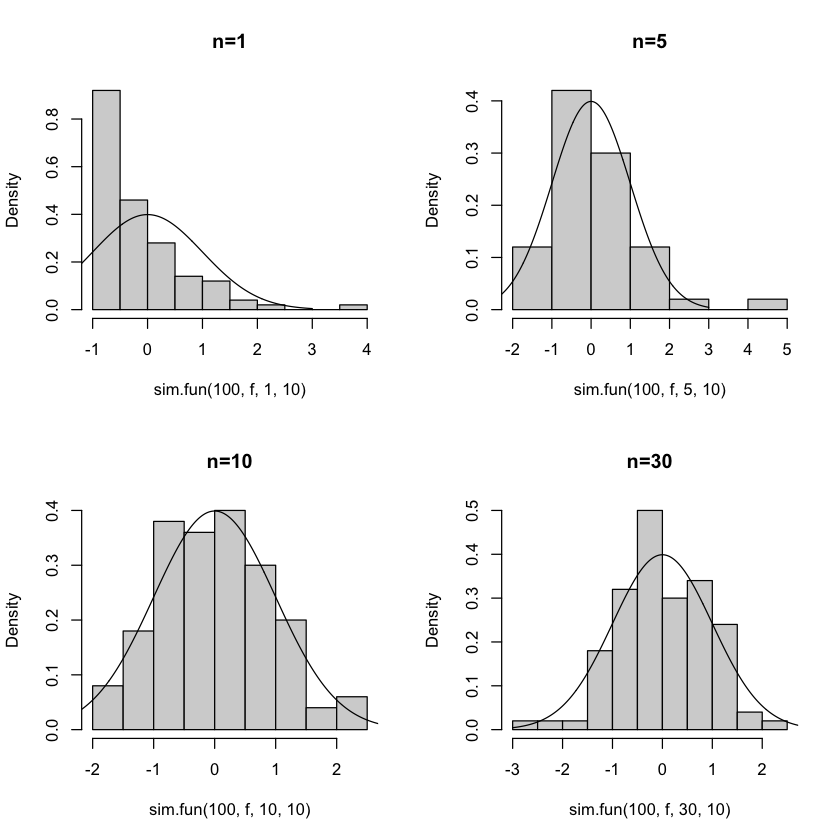

In [10]:
# 例4.9
x = seq(-3,3,0.01)
par(mfrow = c(2,2))
hist(sim.fun(100,f,1,10),prob = T,main="n=1")
points(x,dnorm(x,0,1),type="l")
hist(sim.fun(100,f,5,10),prob = T,main="n=5")
points(x,dnorm(x,0,1),type="l")
hist(sim.fun(100,f,10,10),prob = T,main="n=10")
points(x,dnorm(x,0,1),type="l")
hist(sim.fun(100,f,30,10),prob = T,main="n=30")
points(x,dnorm(x,0,1),type="l")
par(mfrow = c(1,1))

